<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/maksimina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [469]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import matplotlib.animation as animation

In [470]:
# hyper parameters
k = 1
size = 10000
seed = random.randint(1,100)
delimiter = 10

In [471]:
dim = 2
torch.manual_seed(seed)
X = torch.randn(size, dim)
X.shape

torch.Size([10000, 2])

In [472]:
Labels = torch.zeros(size)
Labels.shape

torch.Size([10000])

In [473]:
E = X.mean().item()
E

-0.00666304025799036

In [474]:
D = (E**2 - torch.mean(X**2)).item()
D

-0.9979436993598938

In [475]:
random.seed(seed)
Centers = torch.stack([X[random.randint(0,size)] for _ in range(k)])
Colors = [i for i in range(k)]
Centers.shape, Colors

(torch.Size([1, 2]), [0])

In [476]:
def new_center(plan_matrix=X, centers=Centers, labels=Labels, classes=k, dims=dim, size=size, true_labels=Colors):
    new_centers = torch.zeros(classes,2)

    for i in range(classes):
        max = 0
        index = 0
        for j in range(len(plan_matrix)):
            if labels[j] == true_labels[i]:
                tmp = torch.sum((plan_matrix[j] - centers[i]) ** 2)
                if tmp > max:
                    index = j
                    max = tmp
        new_centers[i] = torch.tensor([index,max])
    #print(new_centers)
    #print(int(new_centers[torch.argmax(new_centers[:,1]).item(),0].item()))
    return plan_matrix[int(new_centers[torch.argmax(new_centers[:,1]).item(),0].item())], torch.max(new_centers[:,1]).item()

In [477]:
def distance(centers=Centers, delimiter=delimiter):
    distances = []
    for i in range(len(centers)-1):
        tmp = torch.sum((centers[i].unsqueeze(dim=0) - centers[i+1:])**2, dim=1)
        for j in tmp:
            distances.append(j)
    return torch.mean(torch.tensor(distances)) / delimiter

In [478]:
def euclide_fn(plan_matrix=X, centers=Centers, classes=k, dims=dim):
    tmp_tensor = torch.zeros(size,classes)
    #print(tmp_tensor.shape, plan_matrix.shape, centers.shape)
    for i in range(classes):
        tmp_tensor[:,i]=torch.sum((plan_matrix - centers[i].unsqueeze(dim=0))**2, dim=1)
    return tmp_tensor.argmin(dim=1)

In [479]:
def visualize(plan_matrix=X, labels=Labels, centers=Centers,classes=k, dims=dim, true_labels=Colors):
    plt.scatter(plan_matrix[:,0],plan_matrix[:,1], c=labels, cmap='brg')
    plt.scatter(centers[:,0],centers[:,1], s=300, c=true_labels, cmap='brg', alpha=0.9, marker='x')

In [480]:
candidate = new_center()
k+=1
Colors.append(len(Colors))
candidate[0].unsqueeze(dim=0).shape

torch.Size([1, 2])

In [481]:
Centers = torch.cat((Centers, candidate[0].unsqueeze(dim=0)), dim=0)
Centers

tensor([[-0.3272,  0.2305],
        [ 0.9492, -3.9358]])

In [482]:
distance(centers=Centers)

tensor(1.8987)

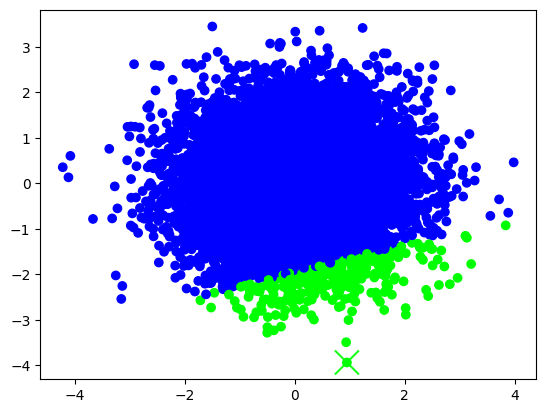

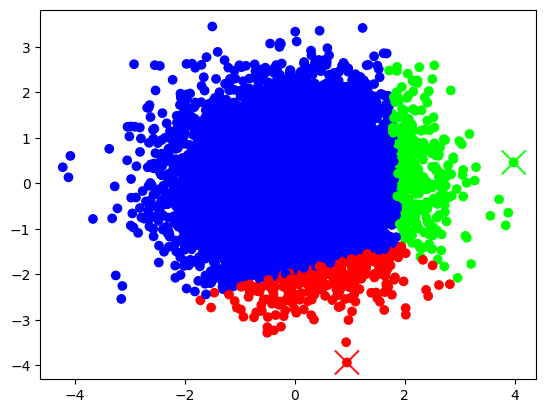

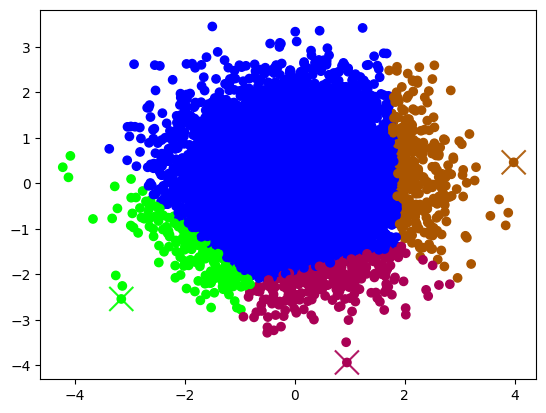

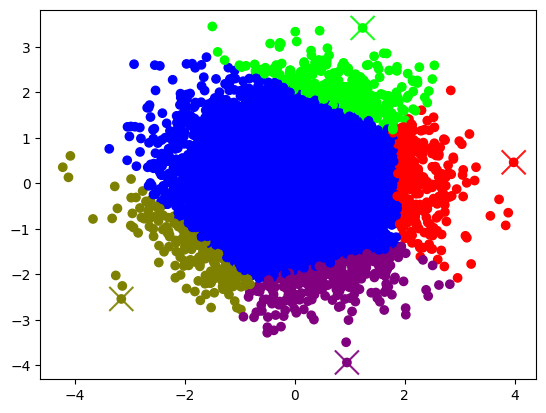

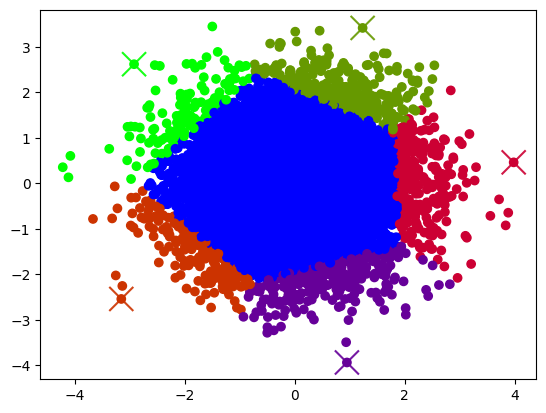

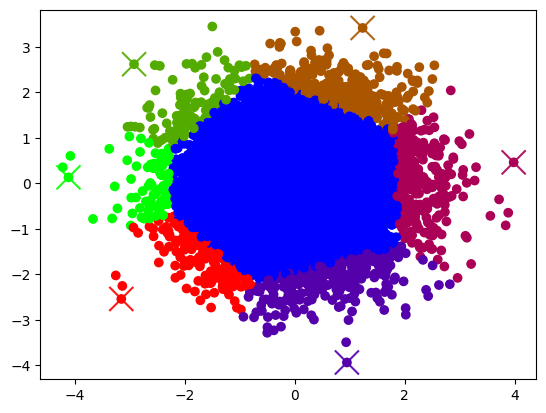

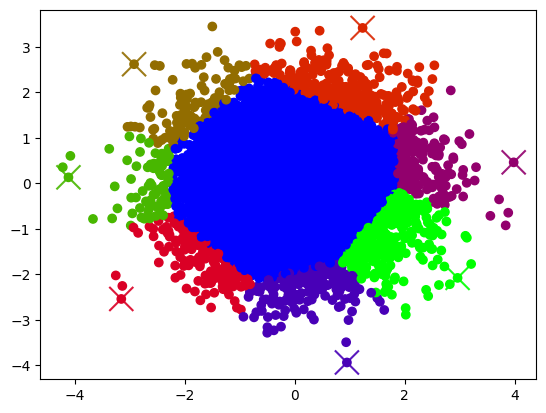

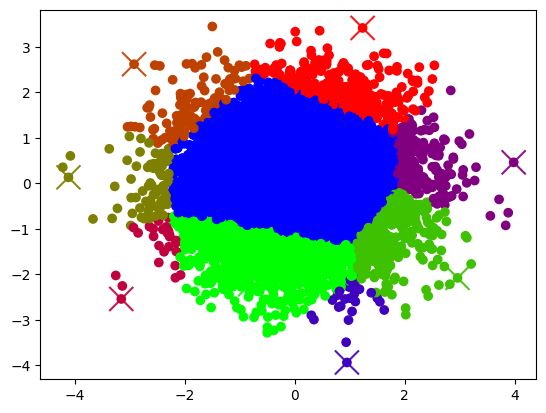

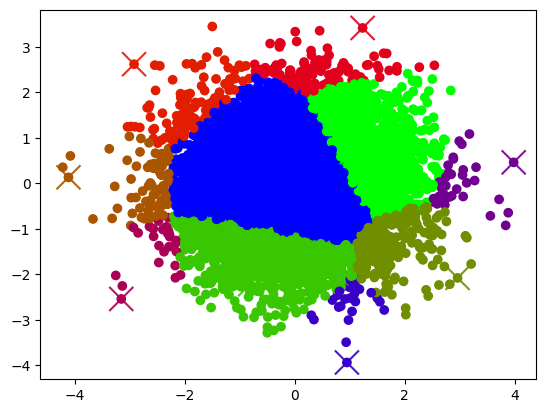

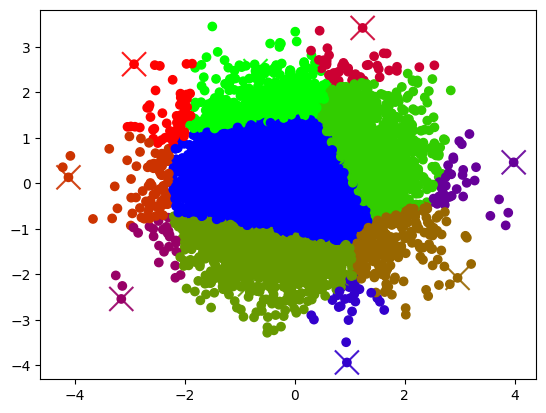

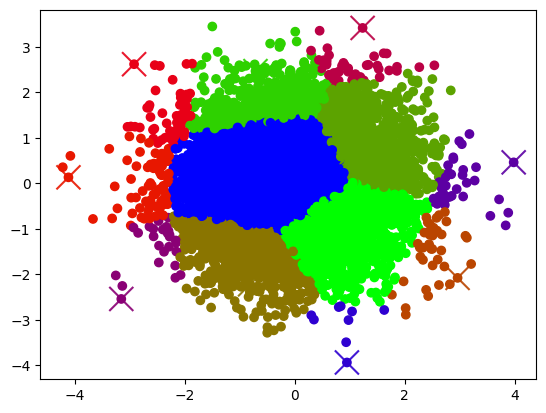

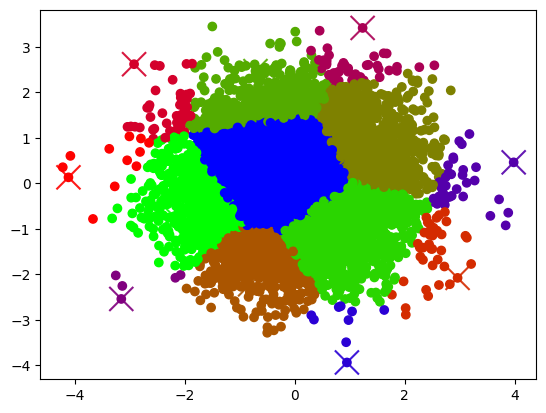

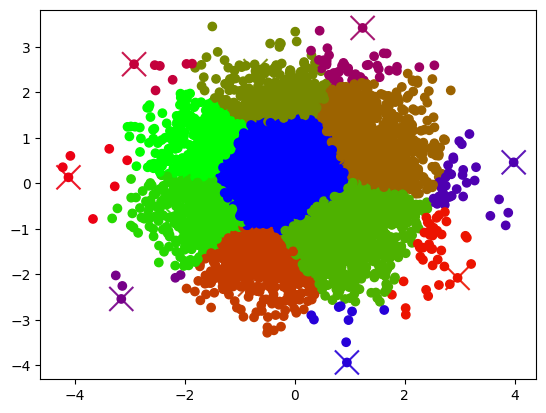

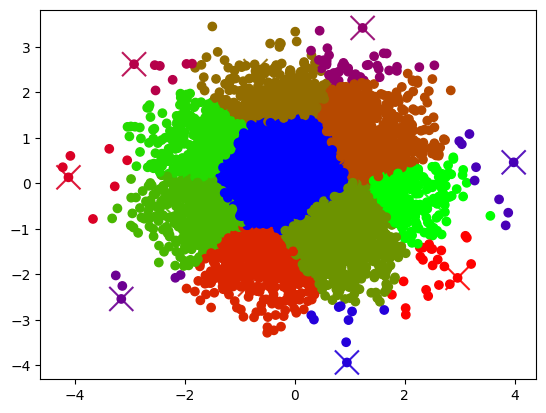

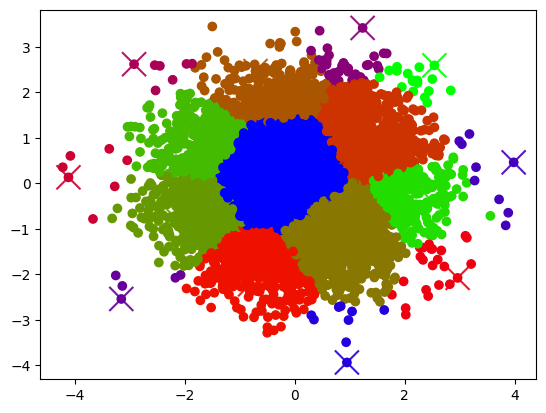

In [483]:
# clasterisation

flag = True
while flag:
    Labels = euclide_fn(centers=Centers, classes=k)

    visualize(labels=Labels, centers=Centers, classes=k, true_labels=Colors)
    plt.show()
    candidate = new_center(centers=Centers, labels=Labels, classes=k, true_labels=Colors)

    T = distance(centers=Centers)
    #print(f'{candidate[1]},||||| {T}')
    if candidate[1] > T:
        k += 1
        Centers = torch.cat((Centers, candidate[0].unsqueeze(dim=0)), dim=0)
        Colors.append(len(Colors))
    else:
        flag = False
    time.sleep(0.2)